In [2]:
import gym
import numpy as np
import time
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt 

In [3]:
env = gym.make('Taxi-v3').env

In [4]:
action_array = ['south', 'north', 'east', 'west', 'pickup', 'drop']
passenger_loc = ['red', 'green', 'yellow', 'blue', 'taxi']
passenger_dest = ['red', 'green', 'yellow', 'blue']

In [5]:
env.observation_space.n

500

In [79]:
class Agent():
    
    def __init__(self, env):
        self.env = env
        self.values = np.zeros((env.observation_space.n, env.action_space.n))
        self.num_visited = np.zeros((env.observation_space.n, env.action_space.n))
        self.average_rewards = []
        self.num_timesteps = []
        self.success_rates = []
        self.num_episodes = 0
        #self.policy = np.ones((env.observation_space.n, env.action_space.n))*(1/env.action_space.n)
        
    def generate_episode(self, epsilon = 0.2):
        state = self.env.reset()
        states = []
        actions = []
        rewards = [0]
        count = 0
        
        while True:
            action_space = self.values[state, :]
            action_choices = np.arange(action_space.size)
            if np.all(action_space == action_space[0]):
                action = np.random.choice(action_choices)
            else:
                explore = np.random.choice([False, True], p = [1 - epsilon, epsilon])
                if explore:
                    optimal_action = np.argmax(action_space)
                    action_choices = np.delete(action_choices, optimal_action)
                    action = np.random.choice(action_choices)
                else:
                    action = np.argmax(action_space)
                    
            states.append(state)
            actions.append(action)
            state, reward, done, info = self.env.step(action)
            count += 1
            rewards.append(reward)
            if reward == 20:
                success = True
                break
            if reward == -10:
                success = False
                break
        
        return states, actions, rewards, count, success
            
    def update_policy(self, gamma = 1, num_episodes = 10, epsilon = 0.2):
        print(self.env.render(mode = 'ansi'))
        _ = input("Press enter to start generating episodes")
        successful_runs = 0
        for i in range(num_episodes):
            states, actions, rewards, count, success = self.generate_episode(epsilon = epsilon)
            if success:
                successful_runs += 1
            self.success_rates.append((successful_runs*100/(self.num_episodes+i+1)))
            ret = 0
            for t in range(len(states) - 1, -1, -1):
                ret = gamma*ret + rewards[t+1]
                state = states[t]
                action = actions[t]
                num_visits = self.num_visited[state, action]
                self.values[state, action] = (num_visits*self.values[state, action] + ret)/(num_visits + 1)
                self.num_visited[state, action] += 1
            self.average_rewards.append(np.sum(rewards)/count)
            self.num_timesteps.append(count)
            print("Episode number = ", i)
            clear_output(wait=True)
        self.num_episodes += num_episodes
        return successful_runs
    
    def analyse_episode(self):
        state = self.env.reset()
        rewards = [0]
        count = 0
        
        while True:
            clear_output(wait=True)
            print(self.env.render(mode = 'ansi'))
            current_state = list(env.decode(state))
            print("Step : ", count)
            print('Grid Position = ', [current_state[0], current_state[1]])
            print("Passenger Location = ", passenger_loc[current_state[2]])
            print("Passenger Destination = ", passenger_dest[current_state[3]])
            action_space = self.values[state, :]
            print("Action Space = ", action_space)
            best_action = np.argmax(action_space)
            print("Best Action here = ", action_array[best_action])
            time.sleep(2)
            state, reward, done, info = self.env.step(best_action)
            print("Reward Recieved = ", reward)
            count += 1
            if reward == 20:
                clear_output(wait=True)
                print(self.env.render(mode = 'ansi'))
                print("SUCCESSFULLY DROPPED PASSENGER")
                break
            if reward == -10:
                clear_output(wait=True)
                print(self.env.render(mode = 'ansi'))
                print('FAILED OPERATION')
                break

In [80]:
agent = Agent(env)

In [89]:
agent.analyse_episode()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step :  69
Grid Position =  [1, 0]
Passenger Location =  yellow
Passenger Destination =  blue
Action Space =  [-31.5 -14.  -12.    0.  -10.  -10. ]
Best Action here =  west


KeyboardInterrupt: 

In [86]:
successful_runs = agent.update_policy(num_episodes = 1000)

Episode number =  999


In [83]:
successful_runs

0

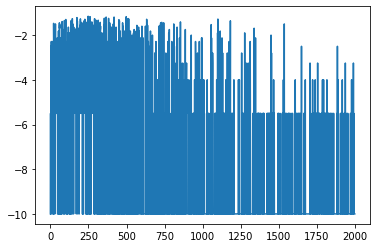

In [87]:
plt.plot(agent.average_rewards)

In [88]:
agent.values

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-14.        , -11.        , -15.        , -12.        ,
        -12.        , -10.        ],
       [-14.        , -15.5       , -14.        , -18.        ,
        -12.33333333, -10.        ],
       ...,
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-24.875     , -24.        , -16.        , -13.        ,
          0.        , -10.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [49]:
value_saver = np.copy(agent.values)

In [51]:
agent.values = np.copy(value_saver)

In [65]:
agent.env.close()

In [37]:
env.close()

In [36]:
env = gym.make('Taxi-v3')
env.close()
state = env.reset()
#print(list(env.decode(state)))
print(env.render(mode = 'ansi'))
_ = input("Press Enter")
for _ in range(200):
    action = np.random.choice(np.arange(4))
    state, reward, done, info = env.step(action)
    print("Reward = ", reward)
    state_tuple = list(env.decode(state))
    print('Grid Position = ', [state_tuple[0], state_tuple[1]])
    print("Passenger Location = ", passenger_loc[state_tuple[2]])
    print("Passenger Destination = ", passenger_dest[state_tuple[3]])
    print("Action Taken = ", action_array[action])
    clear_output(wait=True)
    if done:
        break
    print(env.render())
    time.sleep(1)

None


KeyboardInterrupt: 

In [10]:
help(env.render)

Help on method render in module gym.core:

render(**kwargs) method of gym.wrappers.time_limit.TimeLimit instance
    Renders the environment with kwargs.

